In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso

In [82]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train[:5]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [83]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
ID         173 non-null int64
crim       173 non-null float64
zn         173 non-null float64
indus      173 non-null float64
chas       173 non-null int64
nox        173 non-null float64
rm         173 non-null float64
age        173 non-null float64
dis        173

(None, None)

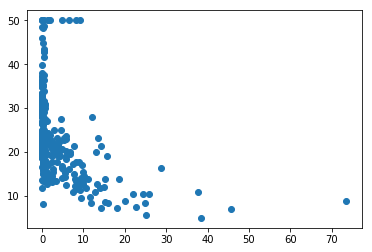

In [84]:
plt.scatter(train['crim'],train['medv'])
plt.show()

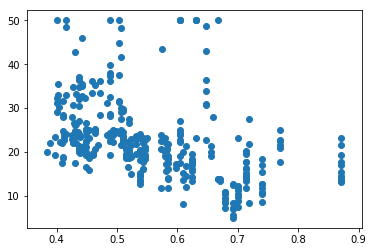

In [85]:
plt.scatter(train['nox'],train['medv'])
plt.show()

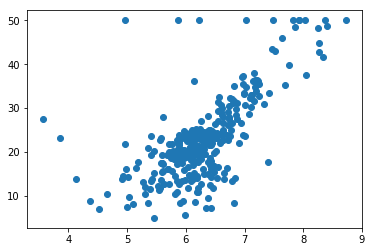

In [86]:
plt.scatter(train['rm'],train['medv'])
plt.show()

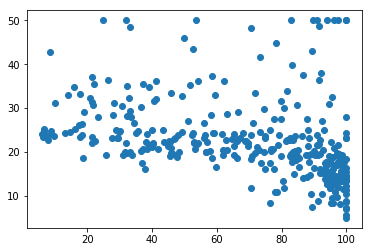

In [87]:
plt.scatter(train['age'],train['medv'])
plt.show()

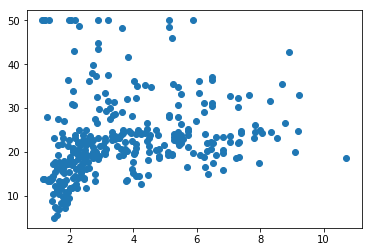

In [88]:
plt.scatter(train['dis'],train['medv'])
plt.show()

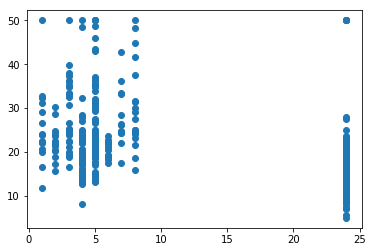

In [89]:
plt.scatter(train['rad'],train['medv'])
plt.show()

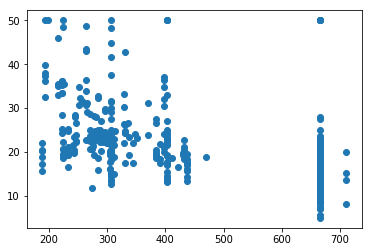

In [90]:
plt.scatter(train['tax'],train['medv'])
plt.show()

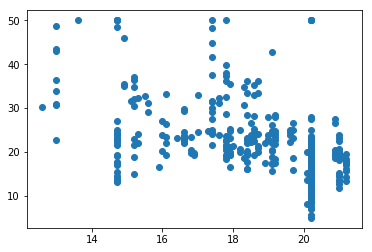

In [91]:
plt.scatter(train['ptratio'],train['medv'])
plt.show()

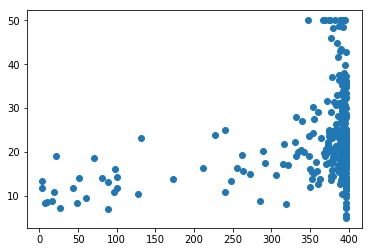

In [92]:
plt.scatter(train['black'],train['medv'])
plt.show()

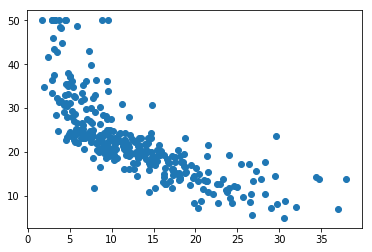

In [93]:
plt.scatter(train['lstat'],train['medv'])
plt.show()

In [94]:
for col in list(train.columns):
    lr=linregress(train[col],train['medv'])
    print('{} vs median value'.format(col))
    print(lr)
    print('\n')

ID vs median value
LinregressResult(slope=-0.013754309918130333, intercept=26.22043969047567, rvalue=-0.22169418651611625, pvalue=4.4799049215400116e-05, stderr=0.003325269852835451)


crim vs median value
LinregressResult(slope=-0.5083828907402254, intercept=24.4771088799097, rvalue=-0.4074543235732592, pvalue=9.476289281606081e-15, stderr=0.06262908551818336)


zn vs median value
LinregressResult(slope=0.1395118002519096, intercept=21.277500741751737, rvalue=0.34484197569664254, pvalue=9.891559793010909e-11, stderr=0.02087302924710128)


indus vs median value
LinregressResult(slope=-0.6212522579351669, intercept=29.784870882836397, rvalue=-0.47393197065920317, pvalue=4.753815970152098e-20, stderr=0.06344503642099782)


chas vs median value
LinregressResult(slope=7.8794728434505075, intercept=22.295527156549518, rvalue=0.20438998859918744, pvalue=0.00017302155596403204, stderr=2.074231545390938)


nox vs median value
LinregressResult(slope=-32.962074413516916, intercept=41.13339550710

In [95]:
X_train,X_test,y_train,y_test=train_test_split(train.drop(['medv'],axis=1),train.medv)

In [96]:
X_train.info(),len(y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 53 to 209
Data columns (total 14 columns):
ID         249 non-null int64
crim       249 non-null float64
zn         249 non-null float64
indus      249 non-null float64
chas       249 non-null int64
nox        249 non-null float64
rm         249 non-null float64
age        249 non-null float64
dis        249 non-null float64
rad        249 non-null int64
tax        249 non-null int64
ptratio    249 non-null float64
black      249 non-null float64
lstat      249 non-null float64
dtypes: float64(10), int64(4)
memory usage: 29.2 KB


(None, 249)

In [97]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
print('train score: {}'.format(gbr.score(X_train,y_train)))
print('test score: {}'.format(gbr.score(X_test,y_test)))

train score: 0.9875604204773485
test score: 0.9084803574316529


In [98]:
params={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_features':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
gs=GridSearchCV(GradientBoostingRegressor(),params,cv=5)
gs.fit(X_train,y_train)
print('best params: {}'.format(gs.best_params_))
print('best score: {}'.format(gs.best_score_))

best params: {'alpha': 0.1, 'max_features': 4}
best score: 0.8814518207742562


In [99]:
gbr=GradientBoostingRegressor(alpha=0.4)
gbr.fit(X_train,y_train)
print('train score: {}'.format(gbr.score(X_train,y_train)))
print('test score: {}'.format(gbr.score(X_test,y_test)))

train score: 0.9875604204773485
test score: 0.9123823498718324


In [100]:
gbr.feature_importances_

array([0.13744557, 0.05976575, 0.00361724, 0.01782702, 0.00787477,
       0.04085495, 0.18863621, 0.09562184, 0.15299872, 0.01231781,
       0.03374904, 0.0252934 , 0.05262111, 0.17137658])

In [101]:
gbr.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x112ab7af8>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x112ab7af8>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_sa

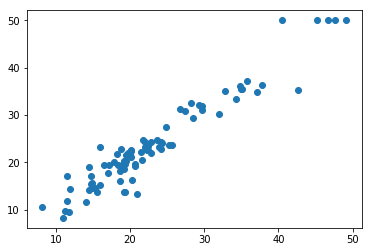

In [102]:
pred=gbr.predict(X_test)
plt.scatter(pred,y_test)
plt.show()

In [113]:
pred=gbr.predict(test)
pred=list(pred)
pred=pd.DataFrame({'ID':test.ID,'medv':pred})
pred[:5]

,ID,medv
0,3,33.901373
1,6,26.255986
2,8,15.654351
3,9,12.396224
4,10,15.946505


In [115]:
pred.to_csv('predictions.csv',index=False)